Nesta tarefa você usar a biblioteca de análise de redes NetworkX para gerar modelos e compara-los com redes reais. Você deve escolher ao menos uma rede disponível no repositório The Colorado Index of Complex Networks (ICON) (https://icon.colorado.edu/#!/), e compará-la com redes geradas pelos três modelos de redes: Aleatório, WS e BA, utilizando as seguintes características: distribuição de grau, distância e clusterização. Faça um relatório discorrendo sobre os valores obtidos.

In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Vamos então avaliar uma rede que representa os jogos de basquete masculino da NCAA durante o torneio de 2017.  

Importante saber:  
  
+ Uma aresta direcionada (i,j) denota que o time i venceu o time j;  
+ Os pesos das arestas são o diferencial de pontos cumulativos.

In [99]:
G = nx.read_gexf("tournament_schedule.gexf")

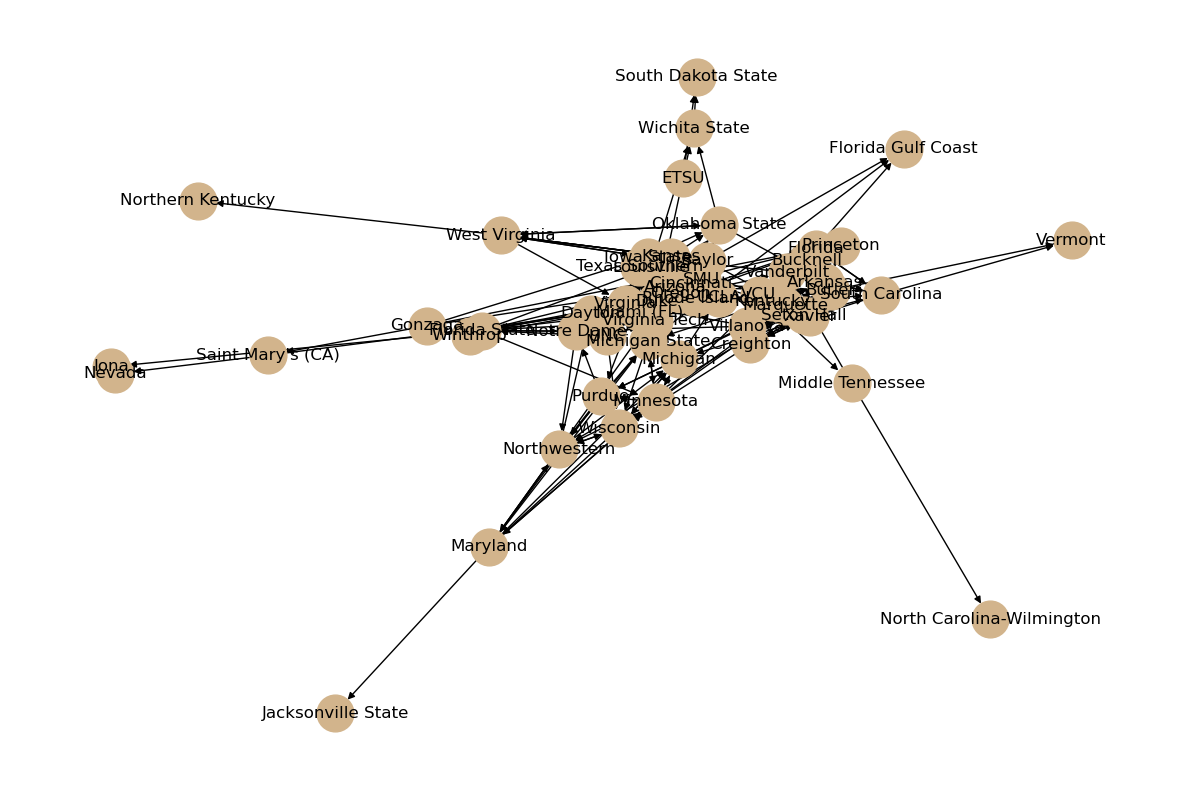

In [100]:
fig, ax = plt.subplots(figsize=(15, 10))
nx.draw(G, with_labels=True, node_size=700, node_color='tan')

## Caracterizando rede

### Análise geral da rede

In [101]:
print("números de nós:", G.number_of_nodes())
print("números de arestas:", G.number_of_edges())

números de nós: 56
números de arestas: 207


Comprimento do caminho mais curto para todos os pares de nós da rede (média)

In [102]:
shortest_path_lengths = dict(nx.all_pairs_shortest_path_length(G))

In [103]:
average_path_lengths = [np.mean(list(spl.values())) for spl in shortest_path_lengths.values()]

round(np.mean(average_path_lengths),2)

2.59

Isso representa a média do comprimento do caminho mais curto para todos os pares de nós. Ou seja, para ir de um nó a outro, aproximadamente 2,59 arestas serão percorridas em média.

Densidade  
(Quanto mais próximo de 0 mais esparço)

In [104]:
nx.density(G)

0.0672077922077922

### Grau

#### Grau geral

O grau de um nó representa o número de arestas incidentes nesse nó. Ou seja, é a quantidade de conexões que um nó possui.

In [105]:
var = nx.degree(G)
var_dict = dict(var)
var_values = list(var_dict.values())

print("equipe com maior:", max(var_dict, key=var_dict.get),"|", max(var_dict.values()))
print("equipe com menor:", min(var_dict, key=var_dict.get),"|", min(var_dict.values()))
print("média:", round(np.mean(var_values),2))
print("std:", round(np.std(var_values),2))

equipe com maior: Duke | 14
equipe com menor: Northern Kentucky | 1
média: 7.39
std: 4.21


Distribuição

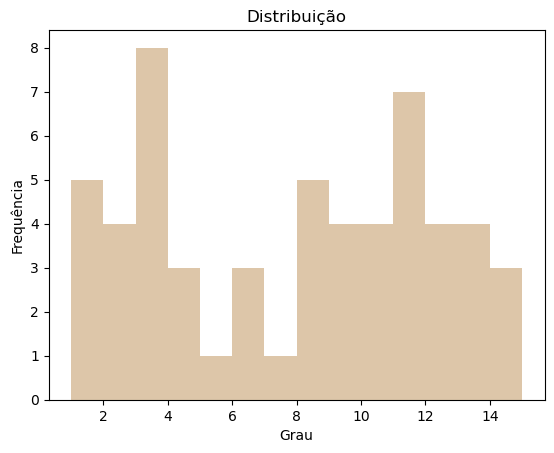

In [106]:
metric = [metric for m, metric in var]
plt.hist(metric, bins=range(min(metric), max(metric) + 2, 1), alpha=0.75, color ='tan')
plt.title("Distribuição")
plt.xlabel("Grau")
plt.ylabel("Frequência")
plt.show()

Ranking

<BarContainer object of 30 artists>

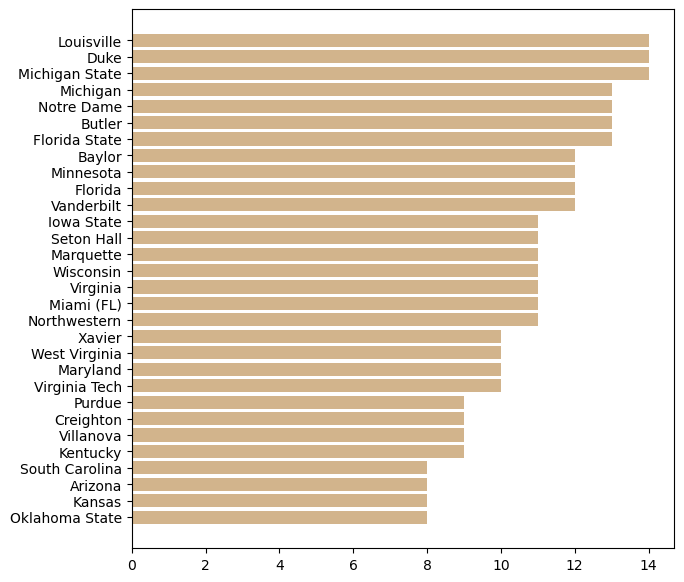

In [107]:
barh_data = pd.DataFrame.from_dict(var_dict, orient='index', columns=['component']).sort_values('component', ascending = True).tail(30)
plt.figure(figsize=(7,7))
plt.barh(list(barh_data.index), list(barh_data.component), color = 'tan')

Podemos avaliar esse ranking como as equipes mais participativas do campeonato (independente de vitória ou derrota).

#### Grau de saída

O grau de saída é o número de arestas que saem desse nó. Na prática pra esse caso, a equipe com maior grau de saída seria a equipe mais vitoriosa.

In [108]:
var = G.out_degree()
var_dict = dict(var)
var_values = list(var_dict.values())

print("equipe com maior:", max(var_dict, key=var_dict.get),"|", max(var_dict.values()))
print("equipe com menor:", min(var_dict, key=var_dict.get),"|", min(var_dict.values()))
print("média:", round(np.mean(var_values),2))
print("std:", round(np.std(var_values),2))

equipe com maior: Butler | 10
equipe com menor: Northern Kentucky | 0
média: 3.7
std: 2.62


Distribuição

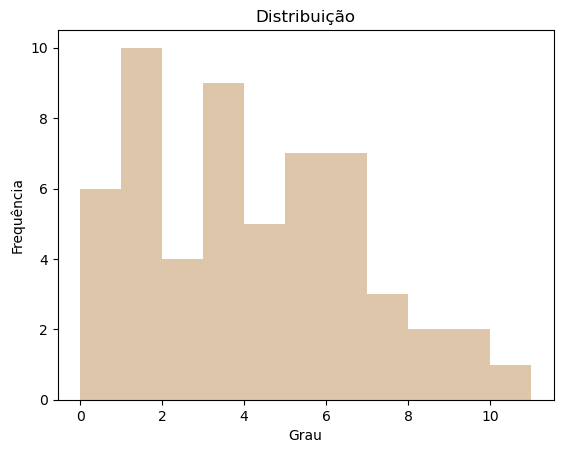

In [109]:
metric = [metric for m, metric in var]
plt.hist(metric, bins=range(min(metric), max(metric) + 2, 1), alpha=0.75, color ='tan')
plt.title("Distribuição")
plt.xlabel("Grau")
plt.ylabel("Frequência")
plt.show()

Ranking

<BarContainer object of 30 artists>

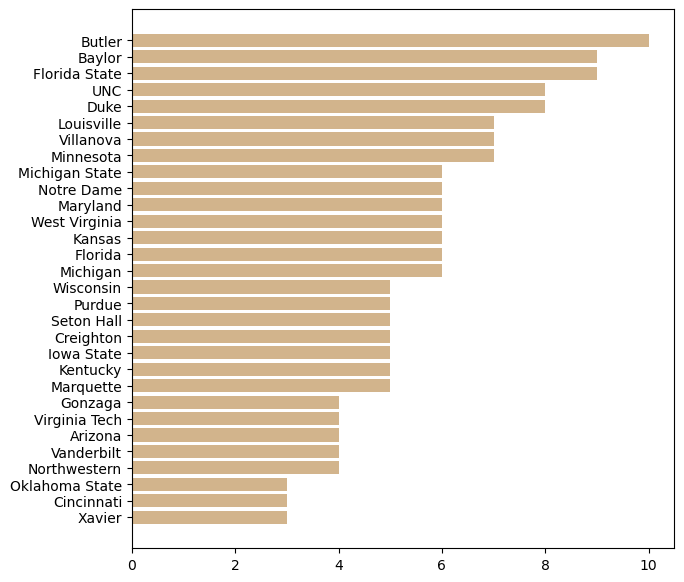

In [110]:
barh_data = pd.DataFrame.from_dict(var_dict, orient='index', columns=['component']).sort_values('component', ascending = True).tail(30)
plt.figure(figsize=(7,7))
plt.barh(list(barh_data.index), list(barh_data.component), color = 'tan')

A equipe com maior número de vitórias foi a Butler.

#### Grau de entrada

Diferente do grau de saída, o grau de entrada representa o número de arestas que chegam nesse nó. Na prática pra esse caso, seria o número de derrotas do nó.

In [111]:
var = G.in_degree()
var_dict = dict(var)
var_values = list(var_dict.values())

print("equipe com maior:", max(var_dict, key=var_dict.get),"|", max(var_dict.values()))
print("equipe com menor:", min(var_dict, key=var_dict.get),"|", min(var_dict.values()))
print("média:", round(np.mean(var_values),2))
print("std:", round(np.std(var_values),2))

equipe com maior: Virginia | 8
equipe com menor: Gonzaga | 0
média: 3.7
std: 2.39


Distribuição

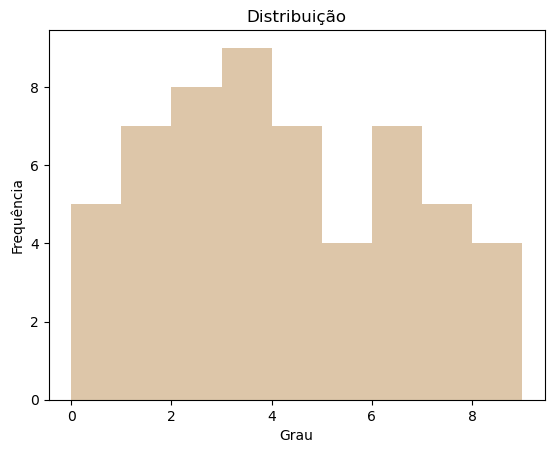

In [112]:
metric = [metric for m, metric in var]
plt.hist(metric, bins=range(min(metric), max(metric) + 2, 1), alpha=0.75, color ='tan')
plt.title("Distribuição")
plt.xlabel("Grau")
plt.ylabel("Frequência")
plt.show()

<BarContainer object of 30 artists>

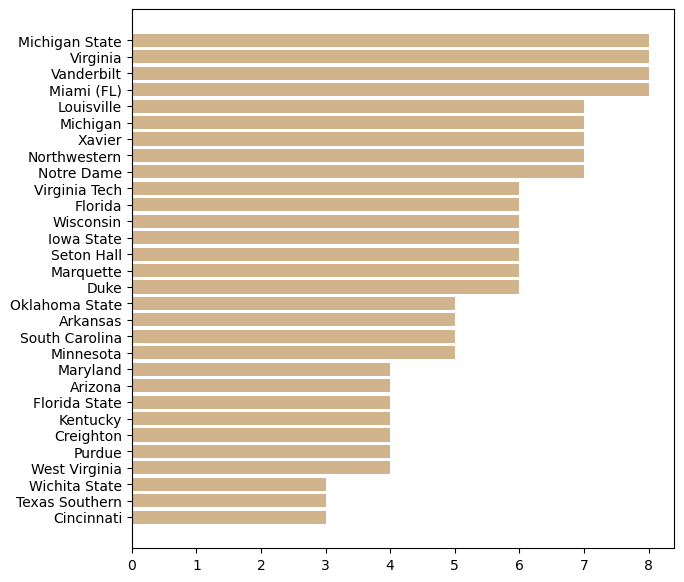

In [113]:
barh_data = pd.DataFrame.from_dict(var_dict, orient='index', columns=['component']).sort_values('component', ascending = True).tail(30)
plt.figure(figsize=(7,7))
plt.barh(list(barh_data.index), list(barh_data.component), color = 'tan')

Vemos que Michigan State, Virginia, Vanderbilt e Miami (FL) possuem o mesmo número de derrotas: 8 partidas.

### Grau de centralidade

O grau de centralidade de um nó é uma medida de quão central esse nó é na rede com base no seu grau. Em outras palavras, é a proporção do número de arestas que um nó possui em relação ao número máximo possível de arestas que poderia ter. Isso significa que quanto maior o grau de centralidade de um nó, mais arestas estão conectadas a esse nó específico e, portanto, mais nós vizinhos esse nó possui.

In [114]:
var = nx.degree_centrality(G)
var_dict = dict(var)
var_values = list(var_dict.values())

print("equipe com maior:", max(var_dict, key=var_dict.get),"|", max(var_dict.values()))
print("equipe com menor:", min(var_dict, key=var_dict.get),"|", min(var_dict.values()))
print("média:", round(np.mean(var_values),2))
print("std:", round(np.std(var_values),2))

equipe com maior: Duke | 0.2545454545454545
equipe com menor: Northern Kentucky | 0.01818181818181818
média: 0.13
std: 0.08


Distribuição

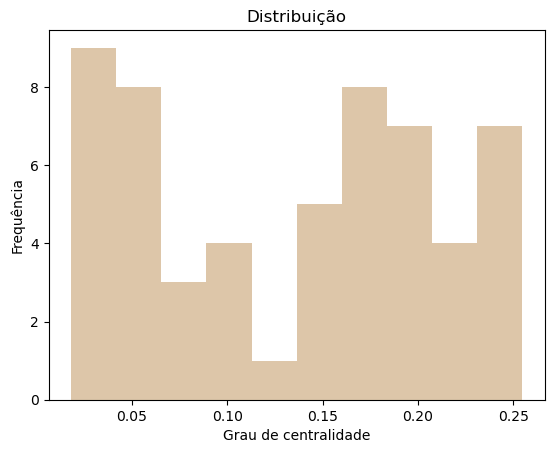

In [115]:
metric = var_values
plt.hist(metric, alpha=0.75, color = "tan")
plt.title("Distribuição")
plt.xlabel("Grau de centralidade")
plt.ylabel("Frequência")
plt.show()

Ranking

<BarContainer object of 30 artists>

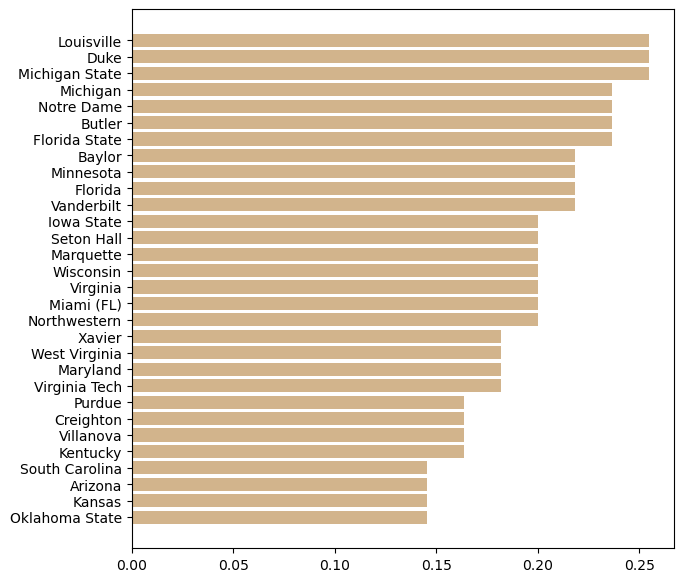

In [116]:
barh_data = pd.DataFrame.from_dict(var_dict, orient='index', columns=['component']).sort_values('component', ascending = True).tail(30)
plt.figure(figsize=(7,7))
plt.barh(list(barh_data.index), list(barh_data.component), color = 'tan')

### Agrupamento

A clusterização em grafos refere-se à identificação de grupos ou comunidades de nós que estão mais densamente conectados entre si do que com o restante do grafo. Em outras palavras, podemos explorar o coeficiente de agrupamento como a probabilidade de dois times que se enfrentaram, tenham enfrentado um outro time.

In [117]:
var = nx.clustering(G)
var_dict = dict(var)
var_values = list(var_dict.values())

print("equipe com maior:", max(var_dict, key=var_dict.get),"|", max(var_dict.values()))
print("equipe com menor:", min(var_dict, key=var_dict.get),"|", min(var_dict.values()))
print("média:", round(np.mean(var_values),2))
print("std:", round(np.std(var_values),2))

equipe com maior: Creighton | 0.6212121212121212
equipe com menor: Dayton | 0
média: 0.22
std: 0.18


Distribuição

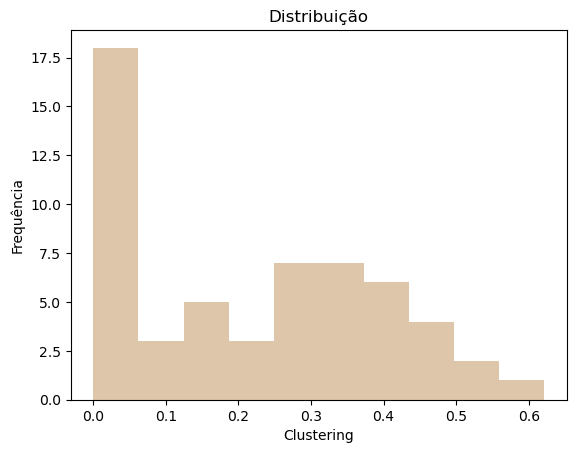

In [118]:
metric = var_values
plt.hist(metric, alpha=0.75, color = "tan")
plt.title("Distribuição")
plt.xlabel("Clustering")
plt.ylabel("Frequência")
plt.show()

Ranking

<BarContainer object of 30 artists>

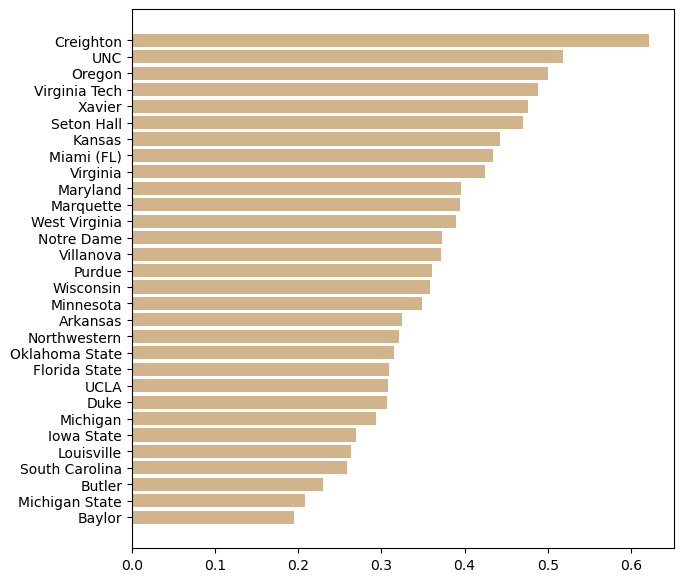

In [119]:
barh_data = pd.DataFrame.from_dict(var_dict, orient='index', columns=['component']).sort_values('component', ascending = True).tail(30)
plt.figure(figsize=(7,7))
plt.barh(list(barh_data.index), list(barh_data.component), color = 'tan')

O coeficiente de agrupamento médio é a média dos coeficientes de agrupamento de todos os nós. Quanto mais próximo de 1, mais completo será o grafo - apenas para fins didáticos, pois já foi explorado nas estatísticas de resumo acima.

In [120]:
nx.average_clustering(G)

0.21535833251091585

### Centralidade de intermediação

O betweenness centrality (centralidade de intermediação) mede a importância de um nó com base na quantidade de caminhos mais curtos que passam por esse nó. Em outras palavras, um nó com alta betweenness centrality atua como ponte entre diferentes partes da rede.

In [121]:
var = nx.betweenness_centrality(G)
var_dict = dict(var)
var_values = list(var_dict.values())

print("equipe com maior:", max(var_dict, key=var_dict.get),"|", max(var_dict.values()))
print("equipe com menor:", min(var_dict, key=var_dict.get),"|", min(var_dict.values()))
print("média:", round(np.mean(var_values),2))
print("std:", round(np.std(var_values),2))

equipe com maior: Vanderbilt | 0.12276497815364745
equipe com menor: Gonzaga | 0.0
média: 0.03
std: 0.03


Distribuição

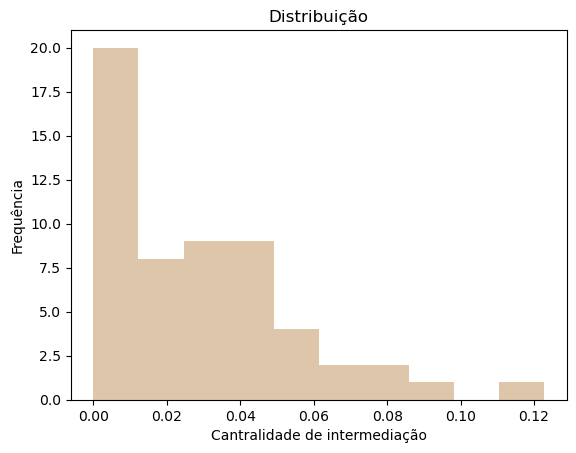

In [122]:
metric = var_values
plt.hist(metric, alpha=0.75, color = "tan")
plt.title("Distribuição")
plt.xlabel("Cantralidade de intermediação")
plt.ylabel("Frequência")
plt.show()

Ranking

<BarContainer object of 30 artists>

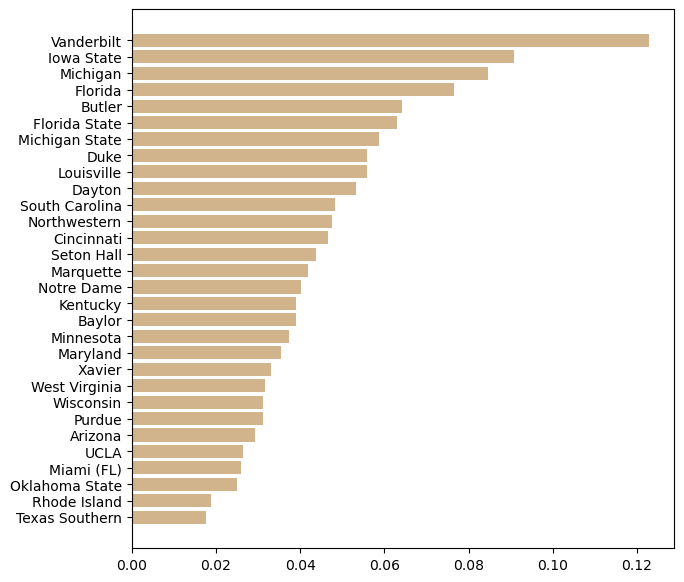

In [123]:
barh_data = pd.DataFrame.from_dict(var_dict, orient='index', columns=['component']).sort_values('component', ascending = True).tail(30)
plt.figure(figsize=(7,7))
plt.barh(list(barh_data.index), list(barh_data.component), color = 'tan')

Analogicamente, podemos dizer que muitas equipes precisaram derrotar a equipe Vanderbilt para evoluir na competição.

### Centralidade de proximidade

A centralidade de proximidade (ou closeness_centrality) pontua cada nó com base em sua “proximidade” com todos os outros nós da rede. Em outras palavras, quanto maior a centralidade de proximidade do nó, mais próximo ele estará do centro da rede.

In [124]:
var = nx.closeness_centrality(G)
var_dict = dict(var)
var_values = list(var_dict.values())

print("equipe com maior:", max(var_dict, key=var_dict.get),"|", max(var_dict.values()))
print("equipe com menor:", min(var_dict, key=var_dict.get),"|", min(var_dict.values()))
print("média:", round(np.mean(var_values),2))
print("std:", round(np.std(var_values),2))

equipe com maior: Vanderbilt | 0.35402097902097907
equipe com menor: Gonzaga | 0.0
média: 0.23
std: 0.1


Distribuição

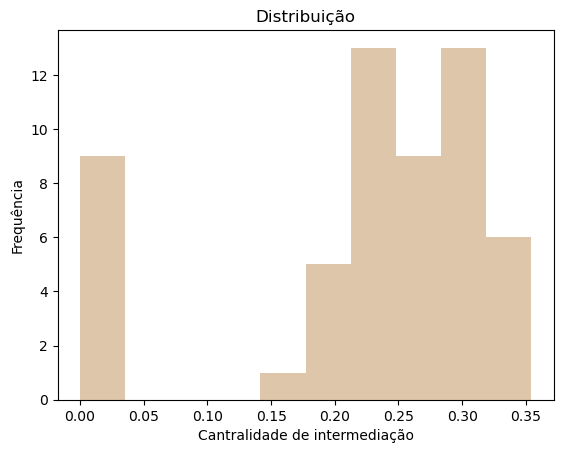

In [125]:
metric = var_values
plt.hist(metric, alpha=0.75, color = "tan")
plt.title("Distribuição")
plt.xlabel("Cantralidade de intermediação")
plt.ylabel("Frequência")
plt.show()

Ranking

<BarContainer object of 30 artists>

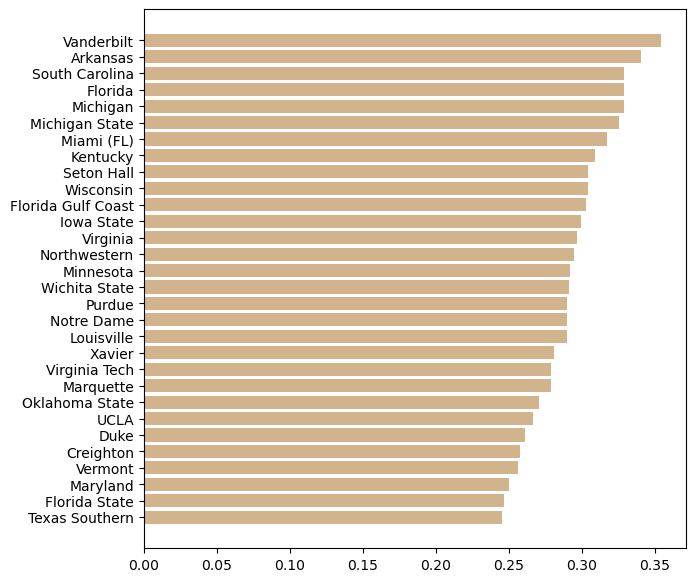

In [126]:
barh_data = pd.DataFrame.from_dict(var_dict, orient='index', columns=['component']).sort_values('component', ascending = True).tail(30)
plt.figure(figsize=(7,7))
plt.barh(list(barh_data.index), list(barh_data.component), color = 'tan')

### Hubs

Um hub é um nó que tem muitas arestas de saída para outros nós. Ou seja, um hub é um nó que é central na distribuição de links de saída. Hubs são podem ser considerados "centrais" no sentido de disseminação.

In [138]:
hubs, authorities = nx.hits(G, max_iter=100)

In [139]:
var = hubs
var_dict = dict(var)
var_values = list(var_dict.values())

print("equipe com maior:", max(var_dict, key=var_dict.get),"|", max(var_dict.values()))
print("equipe com menor:", min(var_dict, key=var_dict.get),"|", min(var_dict.values()))
print("média:", round(np.mean(var_values),2))
print("std:", round(np.std(var_values),2))

equipe com maior: Villanova | 0.24207645948877762
equipe com menor: Wichita State | -1.5791096355032216e-18
média: 0.02
std: 0.04


Distribuição

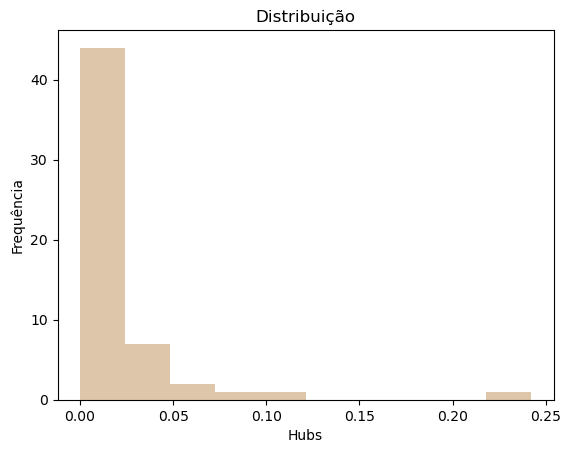

In [140]:
metric = var_values
plt.hist(metric, alpha=0.75, color = "tan")
plt.title("Distribuição")
plt.xlabel("Hubs")
plt.ylabel("Frequência")
plt.show()

Ranking

<BarContainer object of 30 artists>

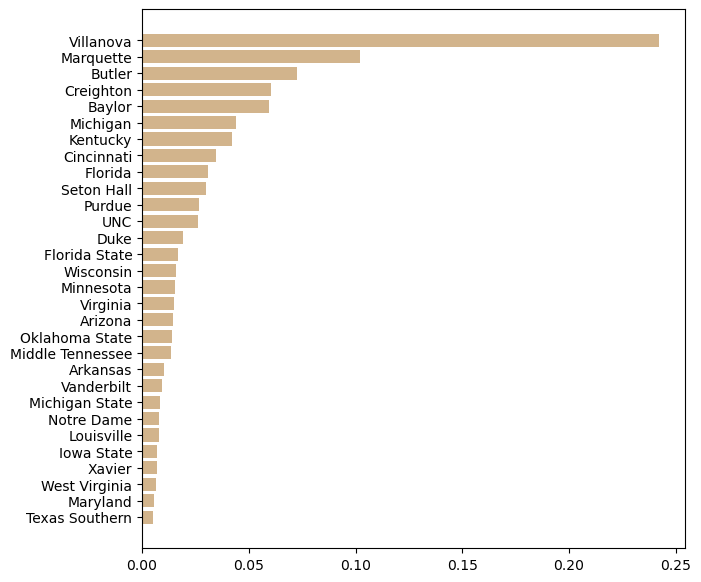

In [141]:
barh_data = pd.DataFrame.from_dict(var_dict, orient='index', columns=['component']).sort_values('component', ascending = True).tail(30)
plt.figure(figsize=(7,7))
plt.barh(list(barh_data.index), list(barh_data.component), color = 'tan')

### Authorities

Authorities são nós que são referenciados ou apontados por muitos hubs. Na prática e nesse caso, um nó com authority forte é aquele que sofreu muitas derrotas de nós que venceram muito.

In [142]:
var = authorities
var_dict = dict(var)
var_values = list(var_dict.values())

print("equipe com maior:", max(var_dict, key=var_dict.get),"|", max(var_dict.values()))
print("equipe com menor:", min(var_dict, key=var_dict.get),"|", min(var_dict.values()))
print("média:", round(np.mean(var_values),2))
print("std:", round(np.std(var_values),2))

equipe com maior: Xavier | 0.17523552665259942
equipe com menor: South Dakota State | -5.632441223913715e-18
média: 0.02
std: 0.03


Distribuição

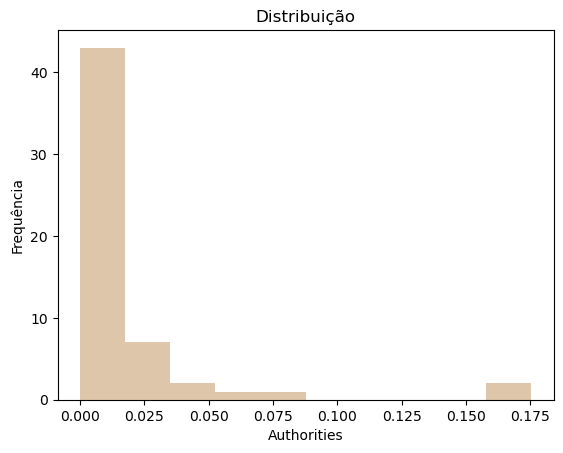

In [143]:
metric = var_values
plt.hist(metric, alpha=0.75, color = "tan")
plt.title("Distribuição")
plt.xlabel("Authorities")
plt.ylabel("Frequência")
plt.show()

Ranking

<BarContainer object of 30 artists>

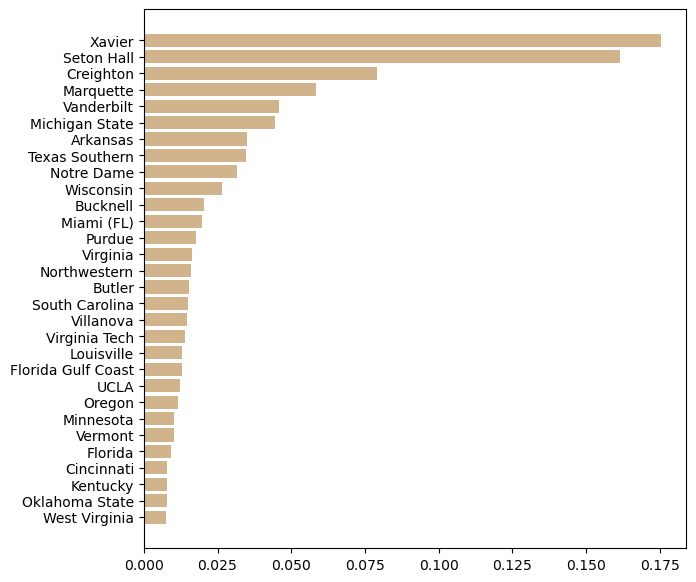

In [144]:
barh_data = pd.DataFrame.from_dict(var_dict, orient='index', columns=['component']).sort_values('component', ascending = True).tail(30)
plt.figure(figsize=(7,7))
plt.barh(list(barh_data.index), list(barh_data.component), color = 'tan')

### Removendo equipes

Em um caso hipotético em que equipes importantes estivessem de fora da competição, como seria a relevância de outras equipes?  
Para esse caso vamos considerar como critério o grau de saída, já que corresponde ao número de vitórias de um nó.

In [145]:
#removendo equipes com graus de saída mais expressivos

team_to_remove = ['Butler', 'Baylor', 'Florida State']

for t in team_to_remove:
    G.remove_node(t)

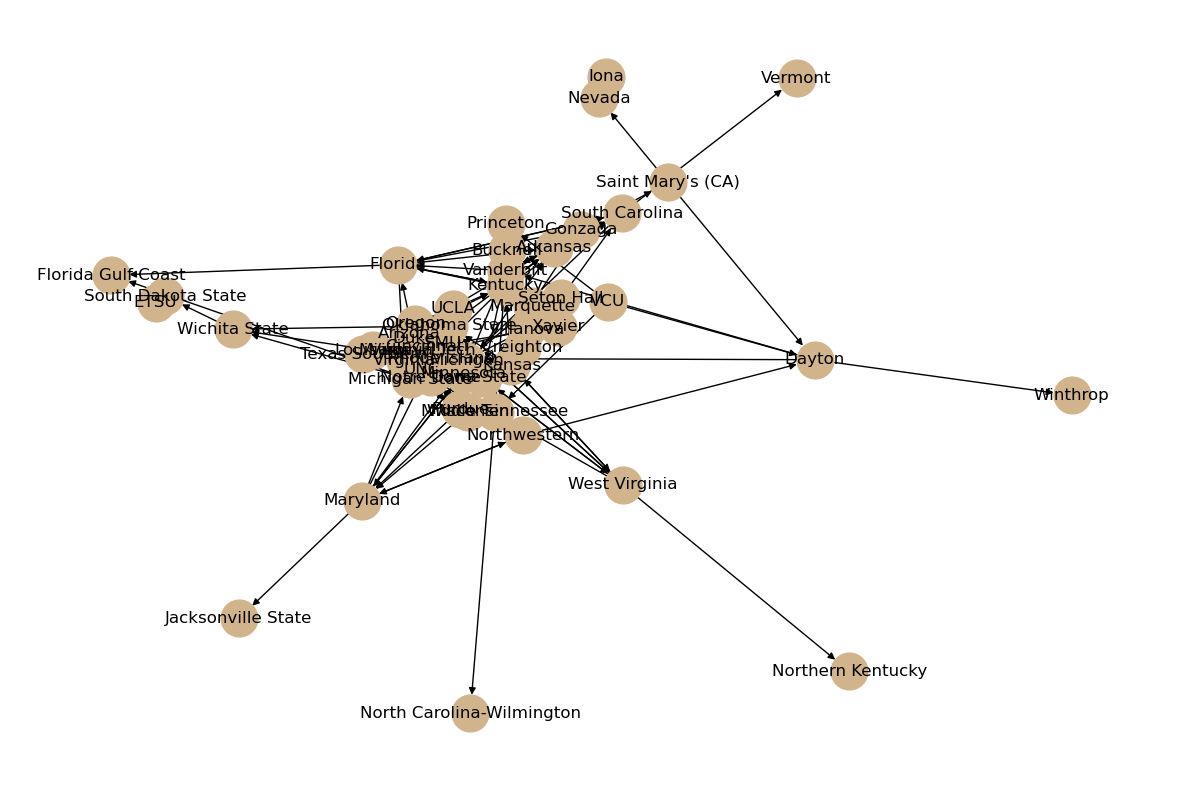

In [146]:
fig, ax = plt.subplots(figsize=(15, 10))
nx.draw(G, with_labels=True, node_size=700, node_color='tan')

In [147]:
#caulando os graus de saída
var = G.out_degree()
var_dict = dict(var)
var_values = list(var_dict.values())

print("equipe com maior:", max(var_dict, key=var_dict.get),"|", max(var_dict.values()))
print("equipe com menor:", min(var_dict, key=var_dict.get),"|", min(var_dict.values()))
print("média:", round(np.mean(var_values),2))
print("std:", round(np.std(var_values),2))

equipe com maior: Duke | 7
equipe com menor: Winthrop | 0
média: 3.19
std: 2.19


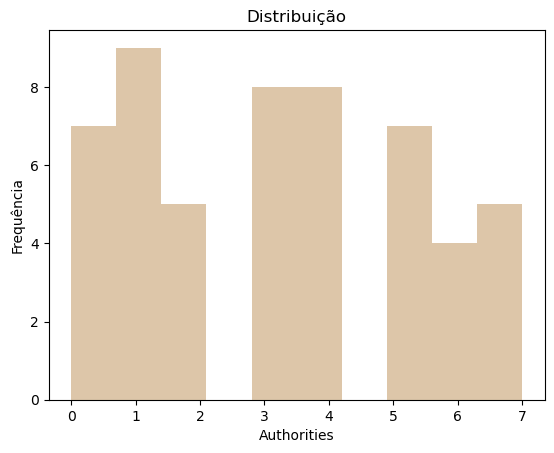

In [148]:
metric = var_values
plt.hist(metric, alpha=0.75, color = "tan")
plt.title("Distribuição")
plt.xlabel("Authorities")
plt.ylabel("Frequência")
plt.show()

<BarContainer object of 30 artists>

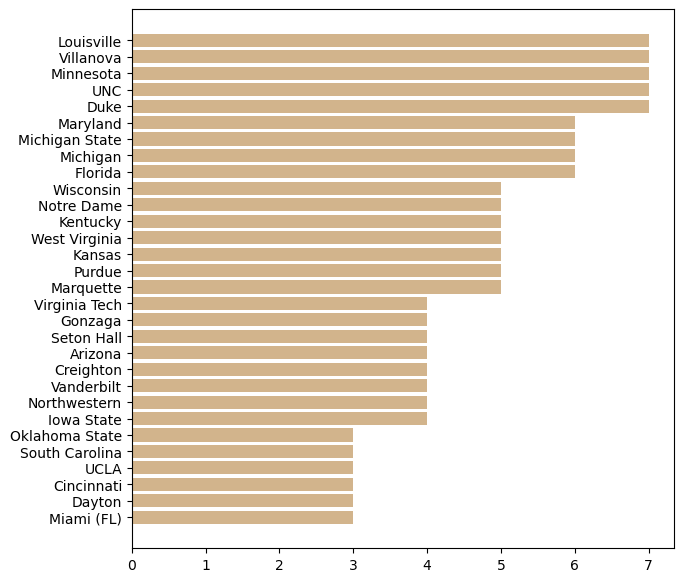

In [149]:
barh_data = pd.DataFrame.from_dict(var_dict, orient='index', columns=['component']).sort_values('component', ascending = True).tail(30)
plt.figure(figsize=(7,7))
plt.barh(list(barh_data.index), list(barh_data.component), color = 'tan')

Caso não tívessemos as equipes mais importantes (com base nesse critério) na competição, 5 outras equipes teriam assumido o protagonismo: Louisville, Villanova, Minnesota, UNC e Duke, com 7 vitórias cada.

### Principais análises

+ As equipes com maior participação na competição, ou seja, que exploraram a maior quantidade de partidas foram Louisville, Duke e Michigan State;
+ As equipes que mais se destacaram na competição foram a Butler, Baylor e Flórida State, pois tiveram o maior número de vitórias;  
+ Em contrapartida, as equipes com mais número de derrotas foram  Michigan State, Virginia e Vanderbilt;  
+ Como perdeu bastante e intuitivamente com uma alta centralidade de intermediação, a equipe Vanderbilt serviu como "ponte" entre as equipes;  
+ Caso as equipes que mais se destacaram na competição tivessem de fora, Louisville e Duke teriam feito por merecer o desgaste e seriam umas as equipes com maior número de vitórias na competição.

## Comparações com redes sintéticas

### Modelo Erdos-Rényi

A abordagem tem como ideia principal que dada uma coleção de nós, as arestas se estabelecem de forma “puramente” aleatória. Ou seja, é um modelo de grafo aleatório que assume que as arestas entre os vértices são distribuídas de forma independente e com a mesma probabilidade.

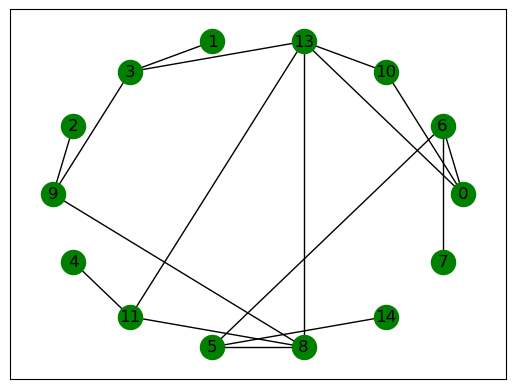

In [96]:
n = 15
p = 0.2

arestas = []
for i in range(n):
    for j in range(i+1, n):
        if np.random.random() < p:
            arestas.append((i,j))

G = nx.from_edgelist(arestas)
nx.draw_networkx(G, nx.layout.circular_layout(G), node_color='green')

#### Características

In [97]:
print("números de nós:", G.number_of_nodes())
print("números de arestas:", G.number_of_edges())

números de nós: 14
números de arestas: 17


Comprimento do caminho mais curto para todos os pares de nós da rede (média)

In [98]:
shortest_path_lengths = dict(nx.all_pairs_shortest_path_length(G))

In [99]:
average_path_lengths = [np.mean(list(spl.values())) for spl in shortest_path_lengths.values()]

round(np.mean(average_path_lengths),2)

2.4

Grau

In [100]:
var = nx.degree(G)
var_dict = dict(var)
var_values = list(var_dict.values())

print("nó com maior:", max(var_dict, key=var_dict.get),"|", max(var_dict.values()))
print("nó com menor:", min(var_dict, key=var_dict.get),"|", min(var_dict.values()))
print("média:", round(np.mean(var_values),2))
print("std:", round(np.std(var_values),2))

nó com maior: 13 | 5
nó com menor: 1 | 1
média: 2.43
std: 1.24


Grau de centralidade

In [101]:
var = nx.degree_centrality(G)
var_dict = dict(var)
var_values = list(var_dict.values())

print("nó com maior:", max(var_dict, key=var_dict.get),"|", max(var_dict.values()))
print("nó com menor:", min(var_dict, key=var_dict.get),"|", min(var_dict.values()))
print("média:", round(np.mean(var_values),2))
print("std:", round(np.std(var_values),2))

nó com maior: 13 | 0.38461538461538464
nó com menor: 1 | 0.07692307692307693
média: 0.19
std: 0.1


Agrupamento

In [102]:
var = nx.clustering(G)
var_dict = dict(var)
var_values = list(var_dict.values())

print("nó com maior:", max(var_dict, key=var_dict.get),"|", max(var_dict.values()))
print("nó com menor:", min(var_dict, key=var_dict.get),"|", min(var_dict.values()))
print("média:", round(np.mean(var_values),2))
print("std:", round(np.std(var_values),2))

nó com maior: 10 | 1.0
nó com menor: 6 | 0
média: 0.15
std: 0.27


Aqui o coeficientes de agrupamento é baixo, pois devido à sua estrutura aleatória, há uma baixa probabilidade de que um vértice esteja fortemente conectado aos vizinhos, o que resulta em uma baixa coerência local. Além disso, essa abordagem sugere distribuição de grau binomial, o que significa que a maioria dos vértices tem um grau próximo ao grau médio do grafo - o que contribui para a falta de agrupamento local.

### Modelo Watts-Strogatz

A abordagem tem como ideia principal a combinação entre regularidade e aleatoriedade para representar a realidade na formação de uma rede. Basicamente, é um modelo de grafo projetado para capturar propriedades de mundo pequeno, combinando a regularidade de grafos anéis com a aleatoriedade de conexões adicionais.

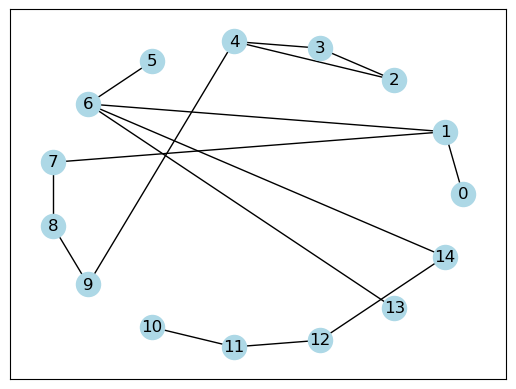

In [103]:
G = nx.watts_strogatz_graph(15,2,0.2)
nx.draw_networkx(G, nx.layout.circular_layout(G), node_color = 'lightblue')

#### Características

In [104]:
print("números de nós:", G.number_of_nodes())
print("números de arestas:", G.number_of_edges())

números de nós: 15
números de arestas: 15


Comprimento do caminho mais curto para todos os pares de nós da rede (média)

In [105]:
shortest_path_lengths = dict(nx.all_pairs_shortest_path_length(G))

In [106]:
average_path_lengths = [np.mean(list(spl.values())) for spl in shortest_path_lengths.values()]

round(np.mean(average_path_lengths),2)

3.81

Grau

In [107]:
var = nx.degree(G)
var_dict = dict(var)
var_values = list(var_dict.values())

print("nó com maior:", max(var_dict, key=var_dict.get),"|", max(var_dict.values()))
print("nó com menor:", min(var_dict, key=var_dict.get),"|", min(var_dict.values()))
print("média:", round(np.mean(var_values),2))
print("std:", round(np.std(var_values),2))

nó com maior: 6 | 4
nó com menor: 0 | 1
média: 2.0
std: 0.82


Grau de centralidade

In [108]:
var = nx.degree_centrality(G)
var_dict = dict(var)
var_values = list(var_dict.values())

print("nó com maior:", max(var_dict, key=var_dict.get),"|", max(var_dict.values()))
print("nó com menor:", min(var_dict, key=var_dict.get),"|", min(var_dict.values()))
print("média:", round(np.mean(var_values),2))
print("std:", round(np.std(var_values),2))

nó com maior: 6 | 0.2857142857142857
nó com menor: 0 | 0.07142857142857142
média: 0.14
std: 0.06


Agrupamento

In [109]:
var = nx.clustering(G)
var_dict = dict(var)
var_values = list(var_dict.values())

print("nó com maior:", max(var_dict, key=var_dict.get),"|", max(var_dict.values()))
print("nó com menor:", min(var_dict, key=var_dict.get),"|", min(var_dict.values()))
print("média:", round(np.mean(var_values),2))
print("std:", round(np.std(var_values),2))

nó com maior: 2 | 1.0
nó com menor: 0 | 0
média: 0.16
std: 0.34


Como possui reorganização aleatória de arestas, essa propriedade pode resultar em uma estrutura de rede onde os vizinhos de um vértice podem não estar fortemente conectados entre si. Além disso, é conhecido por gerar grafos com caminhos curtos (mundo pequeno). Esse tipo de estrutura pode influenciar negativamente o coeficiente de agrupamento.

### Modelo Barabási-Albert

A abordagem tem como ideia principal ligar os nós aleatoriamente, mas dando preferência a nós que já possuam muitas ligações. Esse modelo é baseado no princípio de crescimento preferencial, onde novos vértices são adicionados à rede e preferem se conectar aos vértices existentes que já têm um alto grau. Isso resulta em uma distribuição de grau livre de escala, onde alguns vértices têm um grau muito alto enquanto a maioria tem graus mais baixos.

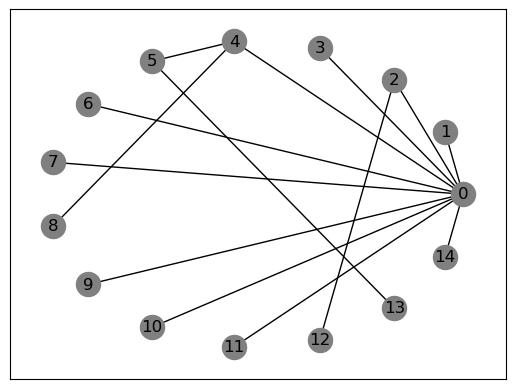

In [110]:
G = nx.barabasi_albert_graph(15,1)
nx.draw_networkx(G, nx.layout.circular_layout(G), node_color = 'gray')

#### Características

In [111]:
print("números de nós:", G.number_of_nodes())
print("números de arestas:", G.number_of_edges())

números de nós: 15
números de arestas: 14


Comprimento do caminho mais curto para todos os pares de nós da rede (média)

In [112]:
shortest_path_lengths = dict(nx.all_pairs_shortest_path_length(G))

In [113]:
average_path_lengths = [np.mean(list(spl.values())) for spl in shortest_path_lengths.values()]

round(np.mean(average_path_lengths),2)

2.22

Grau

In [114]:
var = nx.degree(G)
var_dict = dict(var)
var_values = list(var_dict.values())

print("nó com maior:", max(var_dict, key=var_dict.get),"|", max(var_dict.values()))
print("nó com menor:", min(var_dict, key=var_dict.get),"|", min(var_dict.values()))
print("média:", round(np.mean(var_values),2))
print("std:", round(np.std(var_values),2))

nó com maior: 0 | 10
nó com menor: 1 | 1
média: 1.87
std: 2.25


Grau de centralidade

In [115]:
var = nx.degree_centrality(G)
var_dict = dict(var)
var_values = list(var_dict.values())

print("nó com maior:", max(var_dict, key=var_dict.get),"|", max(var_dict.values()))
print("nó com menor:", min(var_dict, key=var_dict.get),"|", min(var_dict.values()))
print("média:", round(np.mean(var_values),2))
print("std:", round(np.std(var_values),2))

nó com maior: 0 | 0.7142857142857142
nó com menor: 1 | 0.07142857142857142
média: 0.13
std: 0.16


Agrupamento

In [116]:
var = nx.clustering(G)
var_dict = dict(var)
var_values = list(var_dict.values())

print("nó com maior:", max(var_dict, key=var_dict.get),"|", max(var_dict.values()))
print("nó com menor:", min(var_dict, key=var_dict.get),"|", min(var_dict.values()))
print("média:", round(np.mean(var_values),2))
print("std:", round(np.std(var_values),2))

nó com maior: 0 | 0
nó com menor: 0 | 0
média: 0.0
std: 0.0


Conexões Preferenciais:

Como nessa estrutura, novos vértices adicionados tendem a se conectar aos vértices com grau alto, o resultado acaba sendo uma rede com hubs, o que pode levar a um coeficiente de agrupamento baixo, já que hubs tendem a se conectar com muitos vértices não vizinhos entre si. Além disso, intuitivamente, como há poucos vértices altamente conectados (hubs) também há muitos vértices com grau baixo, o que também afeta o coeficiente de agrupamento.

## Conclusões

+ O número de nós em relação ao número de arestas da rede ncaa está mais próximo da rede gerada pelo modelo ER (rede aleatória);  
+ O comprimento do caminho mais curto para todos os pares de nós (em média) da rede ncaa muito se assemelha as redes sintéticas ER e BA, ou seja, para ir de um nó a outro nas 3 redes, aproximadamente o mesmo número de arestas (~2,5) serão percorridas;  
+ A distribuição de grau da rede ncaa está, em média, acima que as 3 redes sintéticas;  
+ O grau de centralidade da rede ncaa e da rede gerada pelo modelo BA são iguais. Ressaltando que, quanto maior o grau de centralidade de um nó, mais arestas estão conectadas a esse nó específico e, portanto, mais nós vizinhos esse nó possui;  
+ Sobre o coeficiente de agrupamento (identificação de grupos ou comunidades de nós que estão mais densamente conectados), a rede ncaa se aproxima da rede sintética gerada pelo modelo WS: 0.22 contra 0.16, respectivamente.
